### Background

Transcription factors are proteins that bind DNA at promoters to drive gene expression. Most preferentially bind to specific sequences while ignoring others. Traditional methods to determine these sequences (called motifs) have assumed that binding sites in the genome are all independent. However, in some cases people have identified motifs where positional interdependencies exist.

### Your task

You will implement a multi-layer fully connected neural network using your `NeuralNetwork` class to predict whether a short DNA sequence is a binding site for the yeast transcription factor Rap1. The training data is incredibly imbalanced, with way fewer positive sequences than negative sequences, so you will implement a sampling scheme to ensure that class imbalance does not affect training. As in step 2, all of the following work should be done in a Jupyter Notebook.

### To-do

* Use the `read_text_file` function from `io.py` to read in the 137 positive Rap1 motif examples.
* Use the `read_fasta_file` function from `io.py` to read in all the negative examples. Note that these sequences are much longer than the positive sequences, so you will need to process them to the same length.
* Balance your classes using your `sample_seq` function and explain why you chose the sampling scheme you did.
* One-hot encode the data using your `one_hot_encode_seqs` function.
* Split the data into training and validation sets.
* Generate an instance of your `NeuralNetwork` class with an appropriate architecture.
* Train your neural network on the training data.
* Plot your training and validation loss by epoch.
* Report the accuracy of your classifier on your validation dataset.
* Explain your choice of loss function and hyperparameters.



In [1]:
pip install .

Processing /Users/abearab/Projects/bmi203-course/final-nn
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for final-nn: filename=final_nn-0.2.5-py3-none-any.whl size=9670 sha256=4cf2ca84983f31772a78358cd572268b84444164554fb709656d82ea9a4f35bb
  Stored in directory: /Users/abearab/Library/Caches/pip/wheels/37/f4/f8/46a7f18911f518b335a8b001d9d3a219bbd190a1cece695c3c
Successfully built final-nn
  Attempting uninstall: final-nn
    Found existing installation: final-nn 0.2.5
    Uninstalling final-nn-0.2.5:
      Successfully uninstalled final-nn-0.2.5
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from nn.nn import NeuralNetwork

In [3]:
from nn.preprocess import *

In [4]:
from nn.io import read_text_file, read_fasta_file

In [24]:
import matplotlib.pyplot as plt

___

In [5]:
# Use the `read_text_file` function from `io.py` to read in the 137 positive Rap1 motif examples.
pos_sequences = read_text_file('data/rap1-lieb-positives.txt')

In [6]:
# Use the `read_fasta_file` function from `io.py` to read in all the negative examples. Note that these sequences are much longer than the positive sequences, so you will need to process them to the same length.
neg_sequences = read_fasta_file('data/yeast-upstream-1k-negative.fa')

In [7]:
sequences = pos_sequences + neg_sequences
sequences_labels = [1] * len(pos_sequences) + [0] * len(neg_sequences)

In [8]:
# Balance your classes using your `sample_seq` function and explain why you chose the sampling scheme you did.
sequences, sequences_labels = sample_seqs(sequences, sequences_labels)

In [16]:
# One-hot encode the data using your `one_hot_encode_seqs` function.
sequences_one_hot = one_hot_encode_seqs(sequences)

sequences_labels = np.array(sequences_labels).reshape(-1, 1)

___

In [19]:
# Split the data into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(
    sequences_one_hot, 
    sequences_labels, 
    test_size=0.2, 
    random_state=42
)

In [44]:
# Generate an instance of your `NeuralNetwork` class with an appropriate architecture.
nn = NeuralNetwork(
    nn_arch=[
        {'input_dim': 4000, 'output_dim': 500, 'activation': 'relu'},
        {'input_dim': 500, 'output_dim': 8, 'activation': 'relu'},
        {'input_dim': 8, 'output_dim': 1, 'activation': 'sigmoid'}
    ],
    lr=0.01,
    seed=42,
    loss_function='binary_cross_entropy',
    epochs=100,
    batch_size=32
)

In [45]:
# Train the model using the `train` method.
loss_train, loss_val = nn.fit(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
)

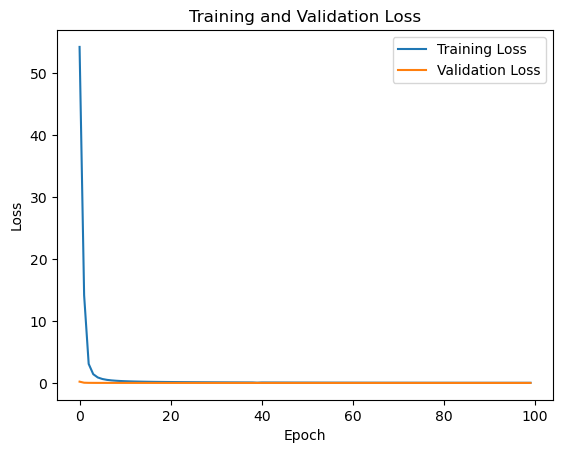

In [48]:
# Plot your training and validation loss by epoch.
plt.plot(loss_train, label='Training Loss')
plt.plot(loss_val, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [49]:
# Report the accuracy of your classifier on your validation dataset.
y_pred = nn.predict(X_val)
accuracy = np.mean((y_pred > 0.5) == y_val)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


Validation Accuracy: 50.00%


#### Choice of Hyperparameters
1. **Learning Rate (`lr=0.01`)**: A moderate learning rate was chosen to ensure stable convergence during training. A smaller learning rate might slow down training, while a larger one could cause the model to overshoot the optimal solution.

2. **Seed (`seed=42`)**: A fixed seed ensures reproducibility of results, which is crucial for debugging and comparing experiments.

3. **Loss Function (`loss_function='binary_crossentropy'`)**: Binary cross-entropy is suitable for binary classification tasks, as it measures the performance of a model whose output is a probability value between 0 and 1.

4. **Epochs (`epochs=100`)**: The model is trained for 100 epochs to allow sufficient time for convergence. This value was chosen based on the size of the dataset and the complexity of the model.

5. **Batch Size (`batch_size=32`)**: A batch size of 32 is a common choice that balances computational efficiency and gradient stability.

6. **Neural Network Architecture**:
    - **Input Layer**: The input layer size is determined by the length of the one-hot encoded sequences.
    - **Hidden Layers**: Several hidden layers with varying numbers of neurons to reduce dimensionality and capture complex patterns.
    - **Output Layer**: A single neuron with a sigmoid activation function to output a probability score for the binary classification task.



___

In [ ]:
%load_ext watermark

In [ ]:
%watermark

Last updated: 2025-03-28T13:57:35.913170-07:00

Python implementation: CPython
Python version       : 3.13.1
IPython version      : 8.31.0

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [ ]:
%watermark -iversions

Email: rsions

Python implementation: CPython
Python version       : 3.13.1
IPython version      : 8.31.0



___